In [2]:
!ls ../data/full_singlerank_05_12_2020/

all_keywords.jsonl
all_keywords_norm_threshold_300_0.015_10000.jsonl
all_keywords_threshold_300_0.015_10000.jsonl
doc_feature_matrix.mtx
dynamic_time_warp_distances.csv
kwds.jsonl
nasa_affiliation.csv
slope_complex.csv
year_counts.csv


In [3]:
!ls ../models/full_singlerank_05_12_2020/

dtw_manifold_proj.jbl      gensim_tok_dct.mm
gensim_corpus.mm           gensim_tokens.jsonl
gensim_corpus.mm.index     kmeans.jbl
gensim_dct.mm              mat_doc_mapping.csv
gensim_tok_corpus.mm       mlb.jbl
gensim_tok_corpus.mm.index topic_models


In [4]:
!ls ../reports/viz/full_singlerank_05_12_2020/

coherence.png                     manifold.png
coherence2020-05-13_17:40:41.csv  topic_distribs_to_bibcodes200.csv
gensim_topic_model_viz200.html    topic_distribs_to_bibcodes600.csv
gensim_topic_model_viz600.html    topic_distribs_to_bibcodes800.csv
gensim_topic_model_viz800.html


In [58]:
!du -sh ../data/full_singlerank_05_12_2020/kwds.jsonl

1.3G	../data/full_singlerank_05_12_2020/kwds.jsonl


In [18]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
exp_name = 'full_singlerank_05_12_2020'

In [20]:
in_data_dir = Path('../data/') / exp_name
in_model_dir = Path('../models') / exp_name
in_report_dir = Path('../reports/viz') / exp_name

In [23]:
in_docs = in_data_dir / "kwds.jsonl"
in_kwds = in_data_dir / "all_keywords_threshold_300_0.015_10000.jsonl"
in_map = in_model_dir / "mat_doc_mapping.csv"
in_bib = in_report_dir / "topic_distribs_to_bibcodes200.csv"

In [79]:
df = pd.read_json(in_docs, orient='records', lines=True)
kwds_df = pd.read_json(in_kwds, orient='records', lines=True)
map_df = pd.read_csv(in_map, index_col=0)
bib_df = pd.read_csv(in_bib, index_col=0)

In [90]:
jdf = bib_df.set_index('bibcode').join(df.set_index('bibcode')['year'])
year = jdf.pop('year')
topics = jdf.values.argmax(axis=1)
 # Could potentially add a limit here. Only take when topic prob is over 0.7 or something.

ty_df = pd.DataFrame({'year': year, 'topic': topics})
ty_df['n'] = 1
cdf = ty_df.groupby(['topic', 'year']).sum().unstack()
cdf = cdf['n']

In [101]:
# cdf

In [91]:
cdf.to_csv('tmp_topic_years.csv')

In [88]:
pd.read_csv('tmp_topic_years.csv', index_col=0)

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
topic,,,,,,,,,,,,,,,,,,,,,
0,42.0,38.0,36.0,38.0,37.0,43.0,50.0,35.0,41.0,54.0,...,160.0,197.0,202.0,219.0,184.0,265.0,204.0,213.0,249.0,293.0
1,32.0,20.0,30.0,39.0,45.0,32.0,37.0,52.0,37.0,51.0,...,85.0,78.0,105.0,105.0,61.0,101.0,68.0,100.0,91.0,126.0
2,29.0,11.0,18.0,13.0,33.0,27.0,23.0,20.0,33.0,32.0,...,26.0,32.0,25.0,36.0,29.0,45.0,31.0,38.0,39.0,50.0
3,54.0,61.0,81.0,76.0,86.0,74.0,101.0,88.0,81.0,109.0,...,127.0,182.0,220.0,237.0,196.0,220.0,158.0,182.0,178.0,239.0
4,5.0,12.0,9.0,7.0,4.0,4.0,16.0,7.0,7.0,7.0,...,25.0,19.0,35.0,18.0,18.0,38.0,32.0,50.0,26.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,185.0,190.0,161.0,188.0,221.0,225.0,227.0,269.0,240.0,236.0,...,433.0,514.0,477.0,633.0,486.0,585.0,535.0,670.0,526.0,738.0
196,9.0,10.0,12.0,6.0,7.0,4.0,3.0,7.0,7.0,6.0,...,11.0,11.0,9.0,14.0,8.0,4.0,8.0,17.0,12.0,10.0
197,311.0,266.0,321.0,288.0,290.0,305.0,352.0,387.0,298.0,359.0,...,633.0,812.0,787.0,855.0,806.0,966.0,802.0,957.0,849.0,1071.0


In [28]:
desc_order_topics = cdf.sum(axis=1).sort_values(ascending=False)

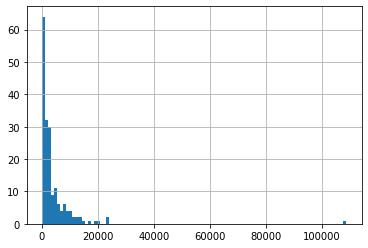

In [30]:
cdf.sum(axis=1).hist(bins=100)
# plt.xlim(0, 50)

In [56]:
topic_ts = cdf.reindex(desc_order_topics.index).iloc[67]['n'].reset_index().fillna(0)

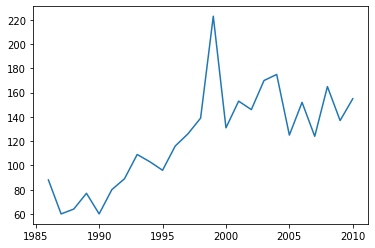

In [60]:
plt.plot(topic_ts['year'], topic_ts.iloc[:, 1])

In [93]:
kwds_df

,stem,score_mean,doc_id_count,doc_id_list,keyword_list,nasa_afil,1986_sum,1987_sum,1988_sum,1989_sum,...,2001_sum,2002_sum,2003_sum,2004_sum,2005_sum,2006_sum,2007_sum,2008_sum,2009_sum,2010_sum
0,dimensional black hol,0.065608,497,"[284, 468, 553, 727, 992, 1443, 1476, 1928, 21...","[Dimensional Black Hole, dimensional black hol...",0.000000,1,2,1,2,...,14,14,21,17,18,26,21,30,32,21
1,black hole solut,0.064412,882,"[395, 1468, 2191, 2924, 3544, 3848, 4126, 4895...","[Black Hole Solutions, black hole solution, Bl...",0.001134,1,2,1,3,...,39,48,32,41,41,43,47,62,85,79
2,ultra high energy cosmic ray,0.061741,357,"[5575, 14081, 15498, 33690, 33821, 35293, 3695...","[Ultra high Energy Cosmic Rays, Ultra HIgh ene...",0.000000,0,0,0,0,...,45,20,44,29,30,30,27,44,21,22
3,black hole entropi,0.061717,541,"[150, 159, 938, 961, 1457, 1902, 1910, 1914, 2...","[Black Hole entropy, black hole entropy, Black...",0.000000,0,0,0,1,...,23,39,23,22,26,35,30,40,43,33
4,black hole thermodynam,0.060426,302,"[1902, 1910, 3731, 3910, 6200, 7947, 7956, 820...","[Black Hole Thermodynamics, Black Hole thermod...",0.000000,0,0,3,4,...,14,10,17,11,23,26,19,29,18,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,angular dist,0.015014,468,"[1624, 2227, 3322, 5122, 6362, 7027, 8299, 855...","[Angular Distance, angular distance, Angular D...",0.008547,10,12,12,14,...,24,20,28,24,17,40,33,38,22,21
4076,small vari,0.015011,564,"[142, 222, 320, 382, 841, 1567, 2626, 2883, 29...","[small variation, small variance, small variab...",0.019504,7,11,10,6,...,33,32,25,33,28,39,38,30,24,44
4077,rapid growth,0.015009,316,"[280, 5081, 15149, 17570, 20473, 20964, 25884,...","[rapid growth, Rapid Growth, rapid Growth]",0.025316,4,3,5,7,...,10,21,20,21,23,26,14,19,24,22
4078,space weath,0.015005,3370,"[318, 429, 825, 1068, 5333, 5603, 7255, 8172, ...","[space weather, Space Weather, space weatherin...",0.014540,0,0,1,0,...,141,308,227,330,262,399,246,373,338,459
